In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
dataset = pd.read_csv(r"./data/loan2.csv")
dataset.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban


In [ ]:
dataset.isnull().sum()


In [23]:
dataset

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...
362,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


# Clining the data

In [24]:
for col in ["Gender", "Married", "Self_Employed","Credit_History", "Dependents"]:
    mode_val = dataset[col].mode()[0]
    dataset[col].fillna(mode_val, inplace=True)


for col in ["Loan_Amount_Term" , "LoanAmount"]:
    mode_val = dataset[col].mean()
    dataset[col].fillna(mode_val, inplace=True)


KeyError: 'Gender'

<function matplotlib.pyplot.show(close=None, block=None)>

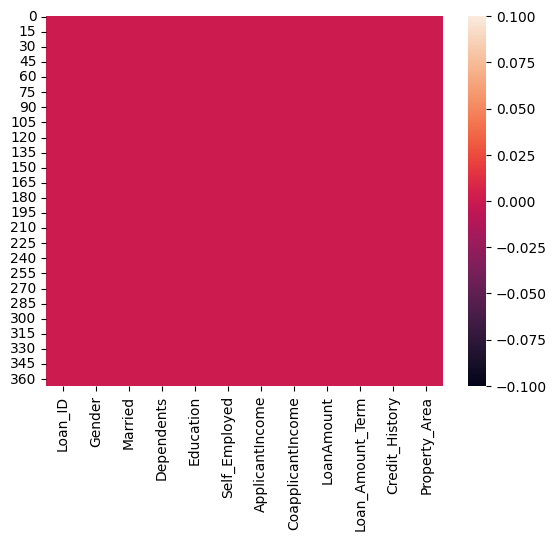

In [ ]:
sns.heatmap(dataset.isnull())
plt.show


In [ ]:
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [ ]:
dataset["Property_Area"].unique()


array(['Urban', 'Semiurban', 'Rural'], dtype=object)

N coding


In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Select the categorical columns
cols = ["Gender", "Married", "Education", "Self_Employed", "Property_Area"]
en_data = dataset[cols]

# Create and fit OneHotEncoder
ohe = OneHotEncoder()
arr = ohe.fit_transform(en_data)

# Convert sparse matrix to dense array before creating DataFrame
encoded_df = pd.DataFrame(arr.toarray(), columns=ohe.get_feature_names_out(cols))
encoded_df


,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
362,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
363,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
364,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
365,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
dataset.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban


In [ ]:
# Drop the original categorical columns
dataset_dropped = dataset.drop(["Gender", "Married", "Education", "Self_Employed", "Property_Area"], axis=1)

# Concatenate the encoded columns
final_dataset = pd.concat([dataset_dropped.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

final_dataset.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001015,0,5720,0,110.0,360.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,LP001022,1,3076,1500,126.0,360.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,LP001031,2,5000,1800,208.0,360.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,LP001035,2,2340,2546,100.0,360.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,LP001051,0,3276,0,78.0,360.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
final_dataset.drop(columns=["Loan_ID"], inplace=True)

In [ ]:
final_dataset

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,5720,0,110.0,360.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1,3076,1500,126.0,360.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,2,5000,1800,208.0,360.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,2,2340,2546,100.0,360.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0,3276,0,78.0,360.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,3+,4009,1777,113.0,360.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
363,0,4158,709,115.0,360.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
364,0,3250,1993,126.0,360.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
365,0,5000,2393,158.0,360.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
fin

NameError: name 'fin' is not defined